In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


CLEANING 0 VALUES

In [2]:
df=pd.read_csv('c:\parami\intern\DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.isna().sum()
#or isnull 

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [4]:
(df==0).sum()

date             0
meantemp         0
humidity         0
wind_speed      26
meanpressure     0
dtype: int64

In [5]:
df=df.replace(0,np.nan)
df

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2013,10.000000,84.500000,NaN,1015.666667
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,28-12-2016,17.217391,68.043478,3.547826,1015.565217
1458,29-12-2016,15.238095,87.857143,6.000000,1016.904762
1459,30-12-2016,14.095238,89.666667,6.266667,1017.904762
1460,31-12-2016,15.052632,87.000000,7.325000,1016.100000


In [6]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1436.000000,1462.000000
mean,25.495521,60.771702,6.925369,1011.104548
std,7.348103,16.769652,4.509069,180.231668
min,6.000000,13.428571,0.462500,-3.041667
25%,18.857143,50.375000,3.700000,1001.580357
50%,27.714286,62.625000,6.264583,1008.563492
75%,31.305804,72.218750,9.257857,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [7]:
df[df.wind_speed.isnull()]

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2013,10.000000,84.500000,NaN,1015.666667
15,16-01-2013,13.833333,86.666667,NaN,1016.666667
47,17-02-2013,13.666667,90.000000,NaN,1012.666667
280,08-10-2013,29.200000,69.400000,NaN,1009.800000
288,16-10-2013,26.428571,75.000000,NaN,1009.000000
290,18-10-2013,26.333333,73.166667,NaN,1010.500000
294,22-10-2013,27.800000,53.600000,NaN,1011.000000
308,05-11-2013,18.833333,74.333333,NaN,1017.500000
319,16-11-2013,16.625000,69.625000,NaN,1018.000000
341,08-12-2013,16.500000,83.625000,NaN,1014.000000


In [8]:
df.wind_speed=np.where(df.wind_speed.isnull(),df.wind_speed.mean(),df.wind_speed)
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [9]:
'''df1=df[df.wind_speed.isnull()]
for i in range(len(df1)):
    x=df1.iloc[i,1:]
    y=df.index[df.date==df1.iloc[i,0]].tolist()
    y=int(y[0])
    df.iloc[y]=df.iloc[y].replace(to_replace=np.nan,value=(x.mean()/x.median()))
print(df)'''
df.iloc[15]

date             16-01-2013
meantemp          13.833333
humidity          86.666667
wind_speed         6.925369
meanpressure    1016.666667
Name: 15, dtype: object

In [10]:
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,6.925369,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [11]:
df=df.drop(df[df.date.dt.year==2017].index)
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,6.925369,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762


CHECKING OUTLIERS

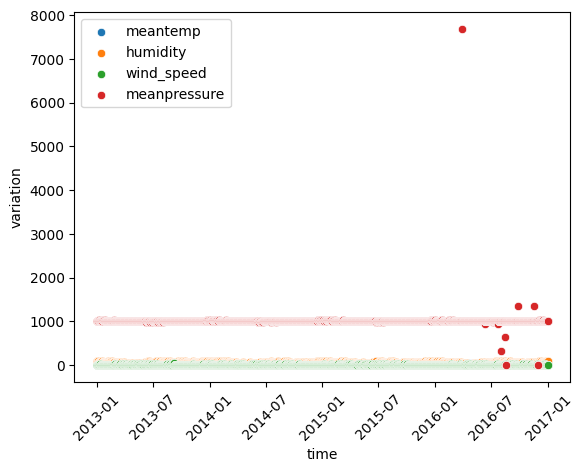

In [12]:
date=df.date.dt.date
for i in df.iloc[:,1:]:   
   sns.scatterplot(data=df,x=date,y=i,label=i)
plt.xlabel('time')
plt.ylabel('variation')
plt.xticks(rotation=45) 
plt.show()

In [13]:
upper=df["meanpressure"].mean()+3*df["meanpressure"].std()
lower=df["meanpressure"].mean()-3*df["meanpressure"].std()
print(upper,lower)

1551.9812030086 470.22119069199255


In [14]:
df.loc[(df.meanpressure>upper)|(df.meanpressure<lower)]

,date,meantemp,humidity,wind_speed,meanpressure
1182,2016-03-28,25.933333,52.800000,6.546667,7679.333333
1309,2016-08-02,30.687500,72.125000,6.375000,310.437500
1323,2016-08-16,31.333333,66.416667,14.666667,-3.041667
1427,2016-11-28,22.454545,37.318182,9.185714,12.045455


In [15]:
df.meanpressure=np.where(df.meanpressure > upper,upper,df.meanpressure)
df.meanpressure=np.where(df.meanpressure < lower,lower,df.meanpressure)

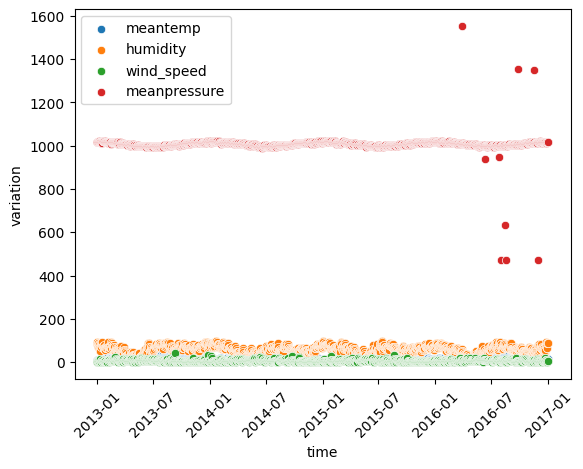

In [16]:
for i in df.iloc[:,1:]:   
   sns.scatterplot(data=df,x=date,y=i,label=i)
plt.xlabel('time')
plt.ylabel('variation')
plt.xticks(rotation=45) 
plt.show()

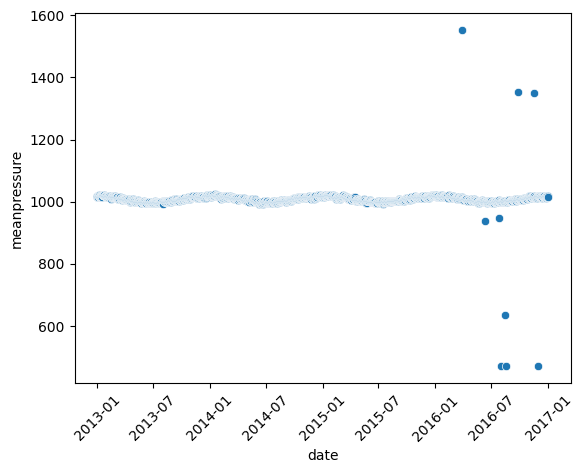

In [17]:
sns.scatterplot(data=df,x="date",y="meanpressure")
plt.xticks(rotation=45) 
plt.show()

(array([15706., 15887., 16071., 16252., 16436., 16617., 16801., 16983.,
        17167.]),
 [Text(15706.0, 0, '2013-01'),
  Text(15887.0, 0, '2013-07'),
  Text(16071.0, 0, '2014-01'),
  Text(16252.0, 0, '2014-07'),
  Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01')])

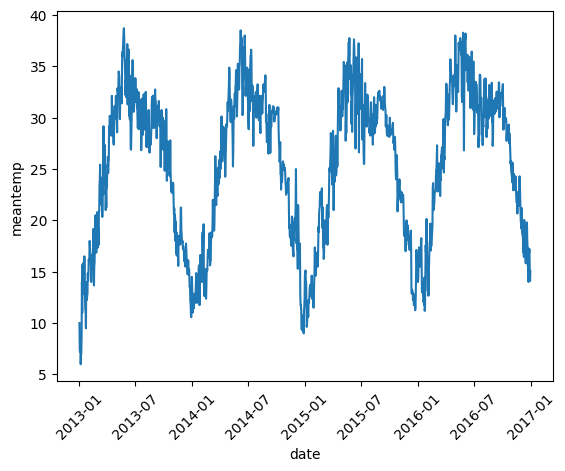

In [18]:
sns.lineplot(data=df,x="date",y="meantemp")
plt.xticks(rotation=45) 

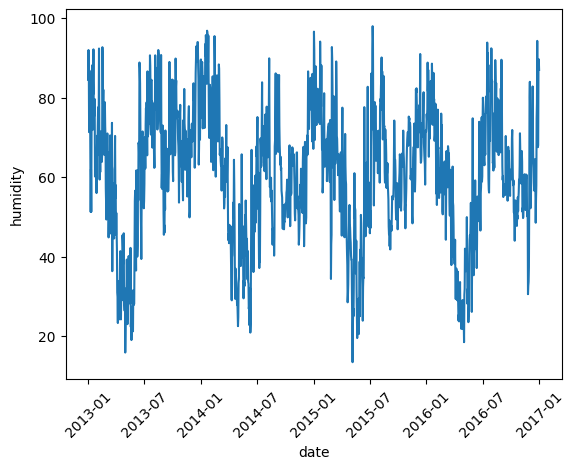

In [19]:
sns.lineplot(data=df,x="date",y="humidity")
plt.xticks(rotation=45) 
plt.show()

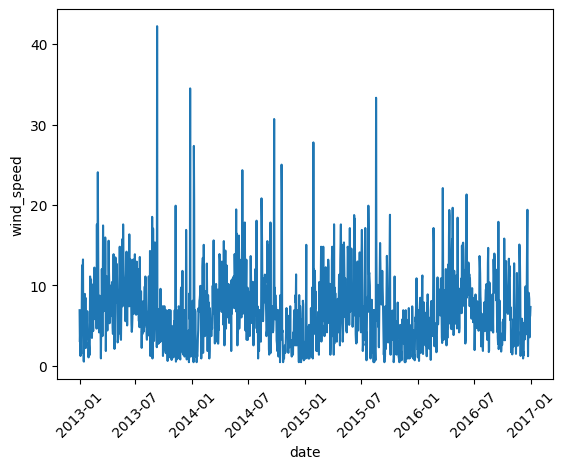

In [20]:
sns.lineplot(data=df,x="date",y="wind_speed")
plt.xticks(rotation=45) 
plt.show()

In [21]:
df.iloc[:,1:]=df.iloc[:,1:].round(2)
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.00,84.50,6.93,1015.67
1,2013-01-02,7.40,92.00,2.98,1017.80
2,2013-01-03,7.17,87.00,4.63,1018.67
3,2013-01-04,8.67,71.33,1.23,1017.17
4,2013-01-05,6.00,86.83,3.70,1016.50
...,...,...,...,...,...
1456,2016-12-27,16.85,67.55,8.34,1017.20
1457,2016-12-28,17.22,68.04,3.55,1015.57
1458,2016-12-29,15.24,87.86,6.00,1016.90
1459,2016-12-30,14.10,89.67,6.27,1017.90


In [22]:
print(pd.date_range(start="2013-01-01", end="2016-12-31").difference(df.date))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


corr

In [23]:
corr=df.iloc[:,1:].corr()
corr

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.570502,0.296805,-0.210872
humidity,-0.570502,1.000000,-0.361266,0.061142
wind_speed,0.296805,-0.361266,1.000000,-0.081144
meanpressure,-0.210872,0.061142,-0.081144,1.000000


<Axes: >

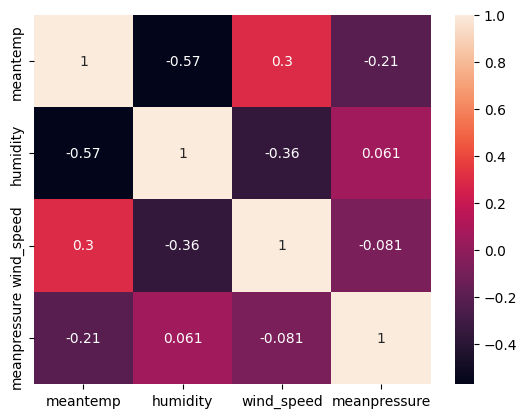

In [24]:
sns.heatmap(corr,annot=True)

GROUPING BY YR

In [25]:
g=df.groupby(df.date.dt.year)
g

In [26]:
g=g.aggregate({"meantemp":['mean','median','std','min','max'],
               "humidity":['mean','median','std','min','max'],
               "wind_speed":['mean','median','std','min','max'],
               "meanpressure":['mean','median','std','min','max']})
g

meantemp                                  humidity                     \
           mean median       std    min    max       mean  median        std   
date                                                                           
2013  24.791534  27.17  7.409204   6.00  38.71  63.046466  66.620  18.191653   
2014  25.010466  26.57  7.597133   9.00  38.50  59.767973  59.880  16.220895   
2015  25.114356  27.62  7.237605   9.62  37.75  61.430301  63.620  15.693266   
2016  27.103388  29.43  6.888247  11.19  38.27  58.740410  59.245  16.512209   

                   wind_speed                               meanpressure  \
        min    max       mean median       std   min    max         mean   
date                                                                       
2013  15.86  94.00   7.017123  6.480  4.688363  0.46  42.22  1007.642356   
2014  20.88  96.86   6.907753  6.490  4.550146  0.46  30.69  1008.347205   
2015  13.43  98.00   6.575315  5.790  4.642053  0.46  33.33  1008.834849   
2016  18.47  94.30   7.200164  6.765  3.959282  0.62  22.10  1005.797322   

                                            
        median        std     min      max  
date                                        
2013  1008.000   7.755065  993.25  1021.80  
2014  1009.620   7.643020  991.38  1023.00  
2015  1009.120   7.427619  993.75  1022.00  
2016  1007.195  65.441104  470.22  1551.98

In [27]:
g.insert(loc = 0, column = 'date',value = g.index)

In [28]:
g=g.reset_index(drop=True)
g

date   meantemp                                  humidity          \
              mean median       std    min    max       mean  median   
0  2013  24.791534  27.17  7.409204   6.00  38.71  63.046466  66.620   
1  2014  25.010466  26.57  7.597133   9.00  38.50  59.767973  59.880   
2  2015  25.114356  27.62  7.237605   9.62  37.75  61.430301  63.620   
3  2016  27.103388  29.43  6.888247  11.19  38.27  58.740410  59.245   

                     ... wind_speed                                \
         std    min  ...       mean median       std   min    max   
0  18.191653  15.86  ...   7.017123  6.480  4.688363  0.46  42.22   
1  16.220895  20.88  ...   6.907753  6.490  4.550146  0.46  30.69   
2  15.693266  13.43  ...   6.575315  5.790  4.642053  0.46  33.33   
3  16.512209  18.47  ...   7.200164  6.765  3.959282  0.62  22.10   

  meanpressure                                        
          mean    median        std     min      max  
0  1007.642356  1008.000   7.755065  993.25  1021.80  
1  1008.347205  1009.620   7.643020  991.38  1023.00  
2  1008.834849  1009.120   7.427619  993.75  1022.00  
3  1005.797322  1007.195  65.441104  470.22  1551.98  

[4 rows x 21 columns]

plotting yearly statistical values

In [29]:
def DatelyStats(info,subcol,dates):
    col=[i for i in [j[0] for j in info.columns] if info[i].equals(subcol)]
    for i in subcol.columns:
     sns.lineplot(data=subcol,x=dates,y=i,label=i)
    plt.xlabel('variation with time')
    plt.ylabel('%s variation'%(col[0]))
    plt.xticks(dates)
    plt.show()

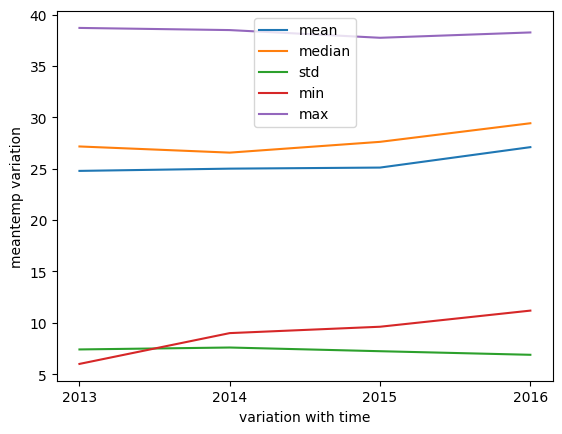

In [30]:
DatelyStats(g,g.meantemp,g.date)


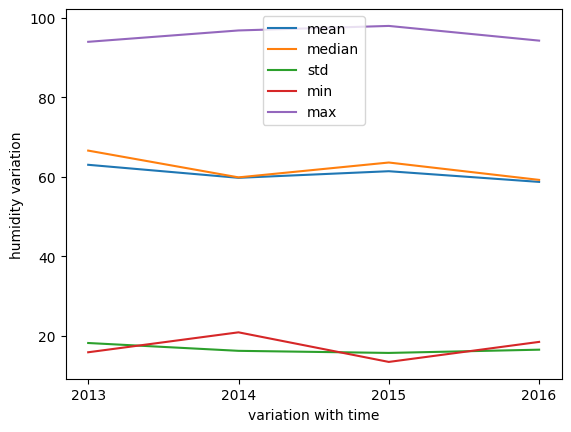

In [31]:
DatelyStats(g,g['humidity'],g.date)

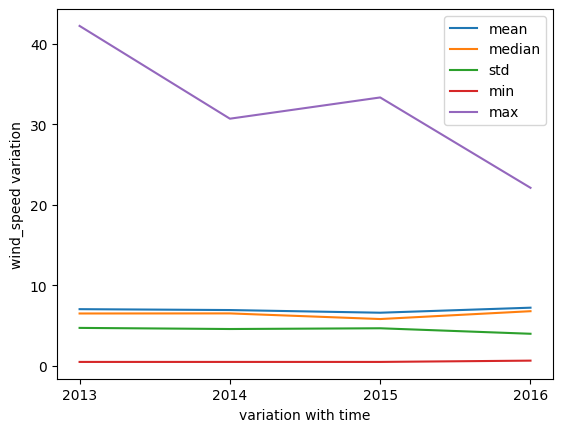

In [32]:
DatelyStats(g,g.wind_speed,g.date)

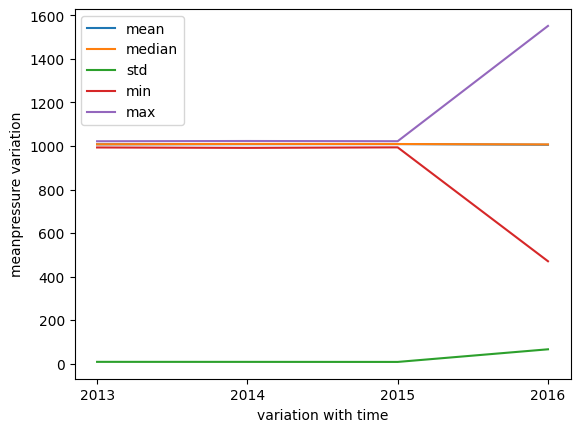

In [33]:
DatelyStats(g,g.meanpressure,g.date)

In [34]:
a=df.groupby(pd.Grouper(key='date',freq='Q-JAN'))

In [35]:
a=a.aggregate({"meantemp":['mean','median','std','min','max'],
               "humidity":['mean','median','std','min','max'],
               "wind_speed":['mean','median','std','min','max'],
               "meanpressure":['mean','median','std','min','max']})

In [36]:
a.insert(loc = 0, column = 'date',value = a.index)
a=a.reset_index(drop=True)

In [37]:
season_mapping = {1: 'Spring', 4: 'Summer', 7: 'Autumn', 10: 'Winter'}
a['season'] = a['date'].dt.month.apply(lambda x: season_mapping[x])+a.date.dt.year.astype(str)

In [38]:
seasons=a.pop('season')
a.insert(loc=1,column='season',value=seasons)
a


date      season   meantemp                                  \
                                mean  median       std    min    max   
0  2013-01-31  Spring2013  12.074194  12.830  3.062744   6.00  16.50   
1  2013-04-30  Summer2013  22.993596  23.430  5.357414  13.67  32.12   
2  2013-07-31  Autumn2013  32.305109  32.100  2.671545  26.83  38.71   
3  2013-10-31  Winter2013  28.491739  29.000  2.613713  22.67  32.75   
4  2014-01-31  Spring2014  15.774783  15.595  2.847032  10.57  23.43   
5  2014-04-30  Summer2014  21.932584  22.000  5.571919  12.38  33.25   
6  2014-07-31  Autumn2014  32.715000  32.380  2.724221  25.25  38.50   
7  2014-10-31  Winter2014  29.216848  30.185  2.817177  23.00  34.12   
8  2015-01-31  Spring2015  15.832826  15.205  4.358373   9.00  25.00   
9  2015-04-30  Summer2015  22.856180  22.500  5.027169  14.62  32.88   
10 2015-07-31  Autumn2015  32.159457  32.060  2.877942  25.50  37.75   
11 2015-10-31  Winter2015  29.267283  29.315  2.502935  20.88  33.00   
12 2016-01-31  Spring2016  16.920326  17.185  3.560274  11.19  24.00   
13 2016-04-30  Summer2016  25.832444  25.745  5.972154  12.67  35.69   
14 2016-07-31  Autumn2016  33.501304  33.620  2.916812  26.81  38.27   
15 2016-10-31  Winter2016  30.509348  30.905  2.011540  24.54  33.81   
16 2017-01-31  Spring2017  20.272295  20.040  3.088414  14.00  25.64   

     humidity                     ... wind_speed                         \
         mean  median        std  ...       mean median       std   min   
0   73.029677  74.000  11.527942  ...   5.280968  5.250  3.237314  0.53   
1   54.298876  57.200  17.674347  ...   8.191573  7.650  3.984889  0.93   
2   54.140326  55.800  21.591958  ...   8.622065  8.420  3.413937  2.24   
3   70.586413  69.725  11.036822  ...   6.220978  5.250  5.451749  0.62   
4   76.764783  75.815  11.436615  ...   5.241304  3.970  5.502356  0.46   
5   58.485506  61.750  16.330776  ...   7.484831  7.180  3.639450  0.92   
6   49.157609  48.560  15.109356  ...   8.723913  7.770  4.087509  1.85   
7   61.276848  59.440  10.808029  ...   6.778696  5.900  5.390820  0.46   
8   67.958804  68.940  13.344967  ...   4.486413  3.595  3.739083  0.46   
9   61.348315  63.500  13.023407  ...   7.545169  6.950  3.786993  1.39   
10  50.686957  48.750  19.471663  ...   8.805326  8.115  4.511920  0.70   
11  61.404130  60.375  10.853709  ...   6.090000  5.440  4.888223  0.46   
12  72.193152  72.335   8.454497  ...   3.714457  3.365  2.670712  0.46   
13  48.807333  53.720  16.006874  ...   7.628333  6.790  4.413101  0.75   
14  55.422391  52.750  18.583072  ...   8.246196  8.145  3.492475  1.86   
15  63.433913  61.740  10.231555  ...   7.320000  6.970  3.768201  1.64   
16  61.567213  59.760  13.441398  ...   6.064098  5.360  4.000984  0.92   

          meanpressure                                         
      max         mean    median        std      min      max  
0   13.23  1017.848065  1017.830   2.226362  1013.33  1021.80  
1   24.07  1011.225169  1010.000   4.778318  1000.00  1018.86  
2   17.59   998.247065   998.070   1.996975   994.75  1003.71  
3   42.22  1004.754674  1003.710   4.419934   993.25  1013.62  
4   34.49  1016.820435  1016.815   2.609451  1011.75  1023.00  
5   15.60  1012.010337  1011.620   3.762688  1003.75  1019.75  
6   24.32   999.538152   999.380   3.958796   991.38  1008.38  
7   30.69  1005.486848  1004.125   5.262959   995.38  1014.88  
8   27.78  1016.462935  1016.740   3.094521  1007.00  1022.12  
9   17.60  1012.062697  1012.620   4.697119  1002.38  1022.00  
10  19.91  1000.227065  1000.000   3.077783   993.75  1007.25  
11  33.33  1006.132283  1005.185   4.732331   998.00  1016.88  
12  11.24  1016.393043  1016.120   2.508335  1011.25  1022.00  
13  22.10  1017.250444  1012.210  57.196392  1001.73  1551.98  
14  21.31   999.241304  1000.010   8.977308   938.07  1007.47  
15  17.91   993.327065  1005.195  94.891464   470.22  1352.62  
16  19.40  1011.890492  1015.570  82.550915   470.22  1350.30 

In [39]:
spring=a[a.date.dt.month==1]
spring

date      season   meantemp                                  \
                                mean  median       std    min    max   
0  2013-01-31  Spring2013  12.074194  12.830  3.062744   6.00  16.50   
4  2014-01-31  Spring2014  15.774783  15.595  2.847032  10.57  23.43   
8  2015-01-31  Spring2015  15.832826  15.205  4.358373   9.00  25.00   
12 2016-01-31  Spring2016  16.920326  17.185  3.560274  11.19  24.00   
16 2017-01-31  Spring2017  20.272295  20.040  3.088414  14.00  25.64   

     humidity                     ... wind_speed                         \
         mean  median        std  ...       mean median       std   min   
0   73.029677  74.000  11.527942  ...   5.280968  5.250  3.237314  0.53   
4   76.764783  75.815  11.436615  ...   5.241304  3.970  5.502356  0.46   
8   67.958804  68.940  13.344967  ...   4.486413  3.595  3.739083  0.46   
12  72.193152  72.335   8.454497  ...   3.714457  3.365  2.670712  0.46   
16  61.567213  59.760  13.441398  ...   6.064098  5.360  4.000984  0.92   

          meanpressure                                         
      max         mean    median        std      min      max  
0   13.23  1017.848065  1017.830   2.226362  1013.33  1021.80  
4   34.49  1016.820435  1016.815   2.609451  1011.75  1023.00  
8   27.78  1016.462935  1016.740   3.094521  1007.00  1022.12  
12  11.24  1016.393043  1016.120   2.508335  1011.25  1022.00  
16  19.40  1011.890492  1015.570  82.550915   470.22  1350.30  

[5 rows x 22 columns]

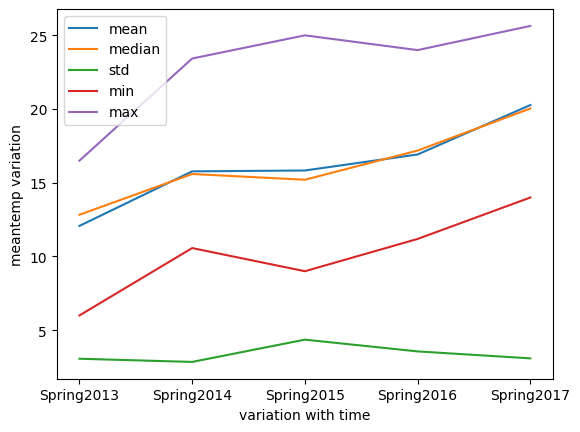

In [40]:
DatelyStats(spring,spring['meantemp'],spring.season)

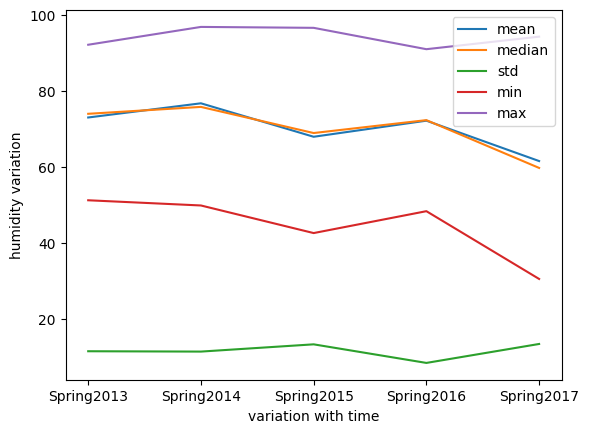

In [41]:
DatelyStats(spring,spring['humidity'],spring.season)

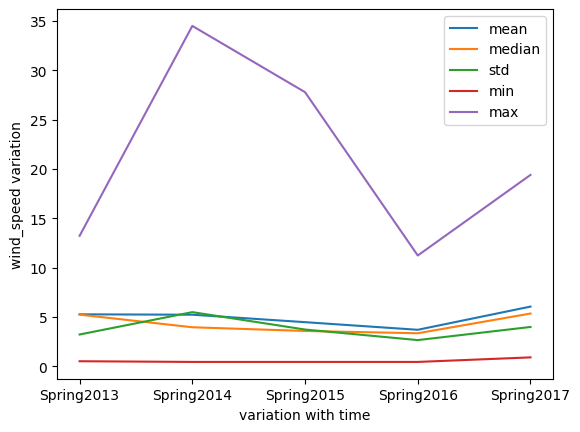

In [42]:
DatelyStats(spring,spring['wind_speed'],spring.season)

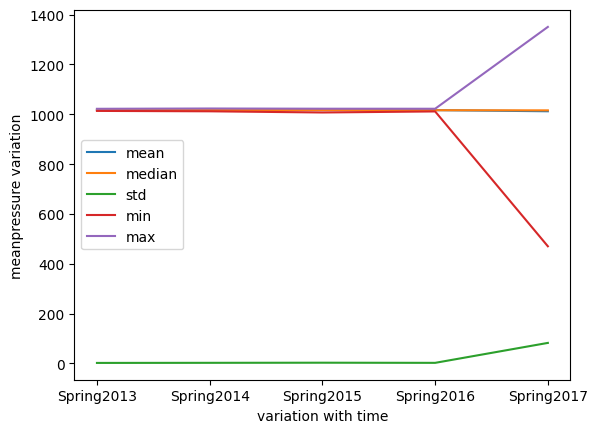

In [43]:
DatelyStats(spring,spring['meanpressure'],spring.season)

In [44]:
m=df.groupby(pd.Grouper(key='date',freq='Q-JAN')).mean()
m

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-31,12.074194,73.029677,5.280968,1017.848065
2013-04-30,22.993596,54.298876,8.191573,1011.225169
2013-07-31,32.305109,54.140326,8.622065,998.247065
2013-10-31,28.491739,70.586413,6.220978,1004.754674
2014-01-31,15.774783,76.764783,5.241304,1016.820435
2014-04-30,21.932584,58.485506,7.484831,1012.010337
2014-07-31,32.715000,49.157609,8.723913,999.538152
2014-10-31,29.216848,61.276848,6.778696,1005.486848
2015-01-31,15.832826,67.958804,4.486413,1016.462935


In [45]:
m.insert(loc = 0, column = 'date',value = m.index)
m=m.reset_index(drop=True)

In [46]:
season_mapping = {1: 'Spring', 4: 'Summer', 7: 'Autumn', 10: 'Winter'}
m['season'] = m['date'].dt.month.apply(lambda x: season_mapping[x])+m.date.dt.year.astype(str)
seasons=m.pop('season')
m.insert(loc=1,column='season',value=seasons)
m

,date,season,meantemp,humidity,wind_speed,meanpressure
0,2013-01-31,Spring2013,12.074194,73.029677,5.280968,1017.848065
1,2013-04-30,Summer2013,22.993596,54.298876,8.191573,1011.225169
2,2013-07-31,Autumn2013,32.305109,54.140326,8.622065,998.247065
3,2013-10-31,Winter2013,28.491739,70.586413,6.220978,1004.754674
4,2014-01-31,Spring2014,15.774783,76.764783,5.241304,1016.820435
5,2014-04-30,Summer2014,21.932584,58.485506,7.484831,1012.010337
6,2014-07-31,Autumn2014,32.715000,49.157609,8.723913,999.538152
7,2014-10-31,Winter2014,29.216848,61.276848,6.778696,1005.486848
8,2015-01-31,Spring2015,15.832826,67.958804,4.486413,1016.462935
9,2015-04-30,Summer2015,22.856180,61.348315,7.545169,1012.062697


In [47]:
spring=m[m.date.dt.month==1]
spring

,date,season,meantemp,humidity,wind_speed,meanpressure
0,2013-01-31,Spring2013,12.074194,73.029677,5.280968,1017.848065
4,2014-01-31,Spring2014,15.774783,76.764783,5.241304,1016.820435
8,2015-01-31,Spring2015,15.832826,67.958804,4.486413,1016.462935
12,2016-01-31,Spring2016,16.920326,72.193152,3.714457,1016.393043
16,2017-01-31,Spring2017,20.272295,61.567213,6.064098,1011.890492


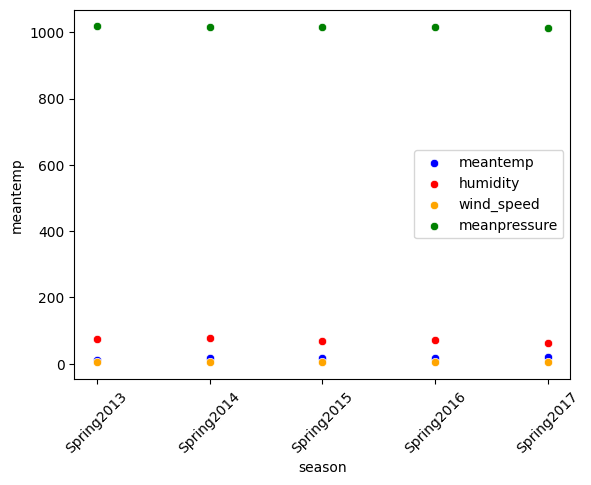

In [48]:
sns.scatterplot(data=spring,x=spring.season,y=spring.meantemp,color='blue',label='meantemp')
sns.scatterplot(data=spring,x=spring.season,y=spring.humidity,color='red',label='humidity')
sns.scatterplot(data=spring,x=spring.season,y=spring.wind_speed,color='orange',label='wind_speed')
sns.scatterplot(data=spring,x=spring.season,y=spring.meanpressure,color='green',label='meanpressure')
plt.xticks(rotation=45)
plt.show()

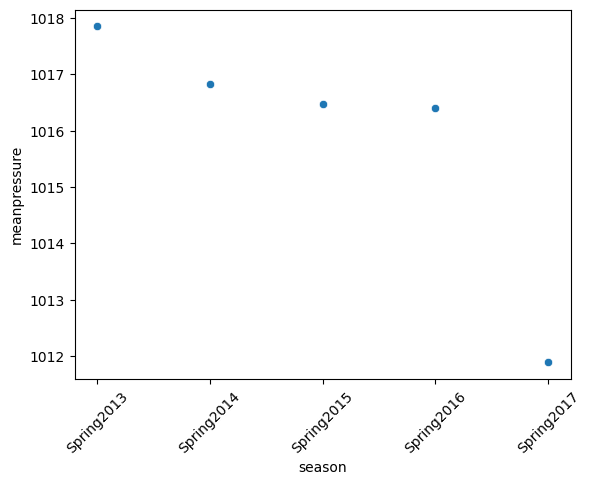

In [49]:
sns.scatterplot(data=spring,x=spring.season,y=spring.meanpressure)
plt.xticks(rotation=45)
plt.show()

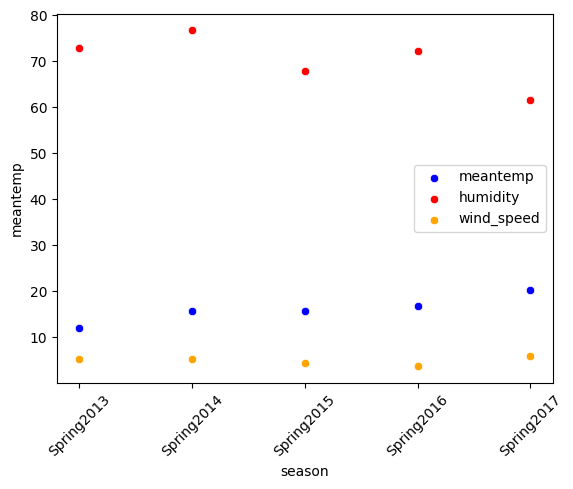

In [50]:
sns.scatterplot(data=spring,x=spring.season,y=spring.meantemp,color='blue',label='meantemp')
sns.scatterplot(data=spring,x=spring.season,y=spring.humidity,color='red',label='humidity')
sns.scatterplot(data=spring,x=spring.season,y=spring.wind_speed,color='orange',label='wind_speed')
plt.xticks(rotation=45)
plt.show()

In [51]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.00,84.50,6.93,1015.67
1,2013-01-02,7.40,92.00,2.98,1017.80
2,2013-01-03,7.17,87.00,4.63,1018.67
3,2013-01-04,8.67,71.33,1.23,1017.17
4,2013-01-05,6.00,86.83,3.70,1016.50
...,...,...,...,...,...
1456,2016-12-27,16.85,67.55,8.34,1017.20
1457,2016-12-28,17.22,68.04,3.55,1015.57
1458,2016-12-29,15.24,87.86,6.00,1016.90
1459,2016-12-30,14.10,89.67,6.27,1017.90


In [52]:
df3=df.groupby(df.date.dt.year).mean()
df3

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013,2013-07-02 00:00:00,24.791534,63.046466,7.017123,1007.642356
2014,2014-07-02 00:00:00,25.010466,59.767973,6.907753,1008.347205
2015,2015-07-02 00:00:00,25.114356,61.430301,6.575315,1008.834849
2016,2016-07-01 12:00:00,27.103388,58.740410,7.200164,1005.797322


In [53]:
df3=df3.drop(df.columns[0],axis=1)

In [54]:
df3.insert(loc=0,column='years',value=df3.index)
df3=df3.reset_index(drop=True)
df3

,years,meantemp,humidity,wind_speed,meanpressure
0,2013,24.791534,63.046466,7.017123,1007.642356
1,2014,25.010466,59.767973,6.907753,1008.347205
2,2015,25.114356,61.430301,6.575315,1008.834849
3,2016,27.103388,58.740410,7.200164,1005.797322


              meantemp  humidity  wind_speed  meanpressure
meantemp      1.000000 -0.759541    0.613758     -0.876873
humidity     -0.759541  1.000000   -0.377376      0.506201
wind_speed    0.613758 -0.377376    1.000000     -0.893026
meanpressure -0.876873  0.506201   -0.893026      1.000000


<Axes: >

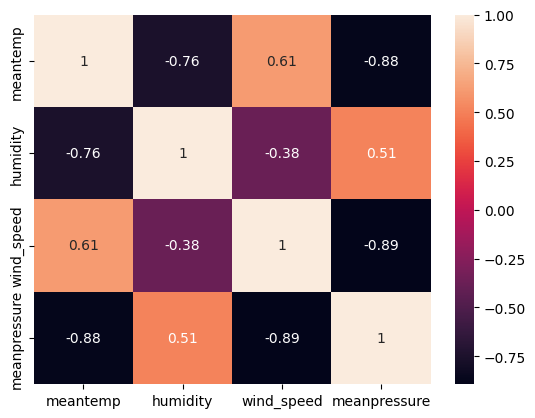

In [55]:
corres=df3.iloc[:,1:].corr()
print(corres)
sns.heatmap(corres,annot=True)

In [56]:
'''def corres(data,cols):
   for i in cols:
    print(data[i].corr())
    sns.heatmap(data[i].corr(),annot=True)
    plt.show()'''

'def corres(data,cols):\n   for i in cols:\n    print(data[i].corr())\n    sns.heatmap(data[i].corr(),annot=True)\n    plt.show()'

In [57]:
'''cols=['meantemp','humidity','wind_speed','meanpressure']
corres(df3,cols)'''

"cols=['meantemp','humidity','wind_speed','meanpressure']\ncorres(df3,cols)"

In [58]:
df.date=pd.to_datetime(df.date)

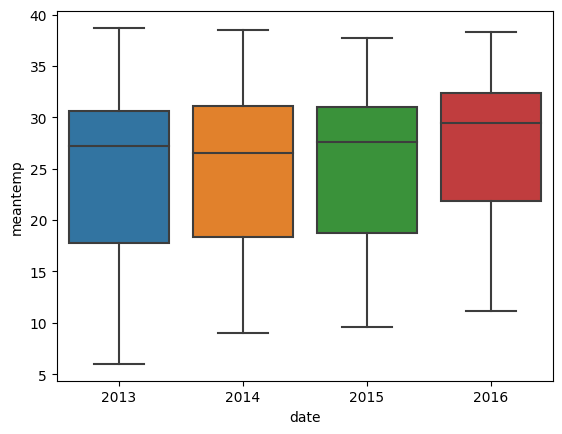

In [59]:
sns.boxplot(x=df.date.dt.year,y=df.meantemp)
plt.show()

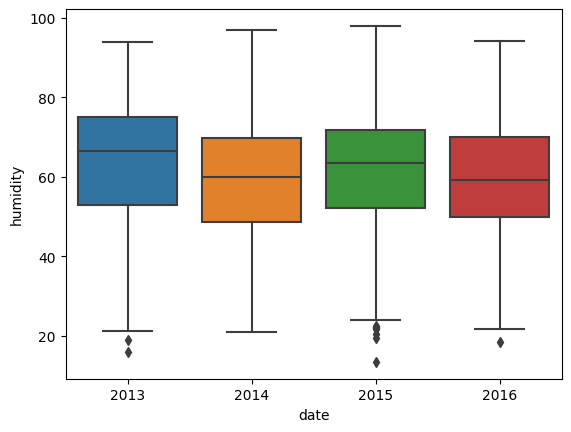

In [60]:
sns.boxplot(x=df.date.dt.year,y=df.humidity)
plt.show()

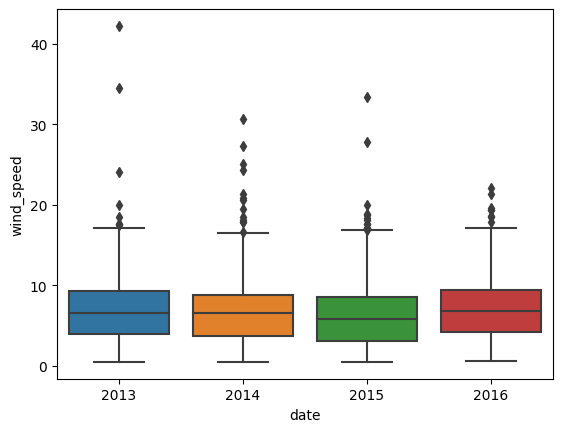

In [61]:
sns.boxplot(x=df.date.dt.year,y=df.wind_speed)
plt.show()

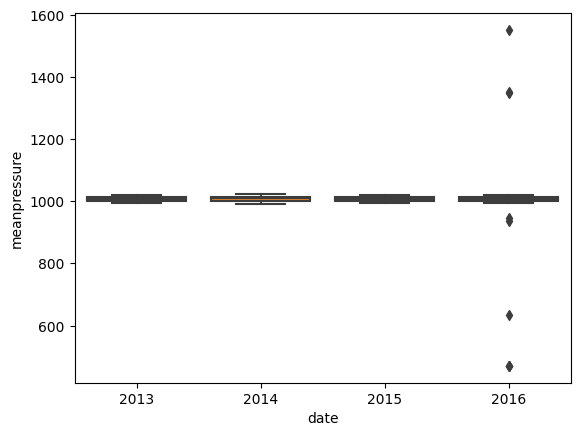

In [62]:
sns.boxplot(x=df.date.dt.year,y=df.meanpressure)
plt.show()

In [156]:
polln=pd.read_csv('city_day.csv')
polln=polln[polln.City=='Delhi']
polln

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [157]:
polln['AQI_Bucket'].unique()

array(['Severe', 'Moderate', 'Very Poor', 'Poor', 'Satisfactory', nan,
       'Good'], dtype=object)

In [158]:
polln.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [159]:
def NoNull(data,col):
    data[col]=np.where(data[col].isnull(),data[col].mean(),data[col])


In [160]:
NoNull(polln,'PM2.5')
NoNull(polln,'PM10')
NoNull(polln,'NO')
NoNull(polln,'NO2')
NoNull(polln,'NH3')
NoNull(polln,'SO2')
NoNull(polln,'O3')
NoNull(polln,'Xylene')
NoNull(polln,'AQI')


In [164]:
mapping = {
    (0, 50): 'Good',
    (51, 100): 'Satisfactory',
    (101, 200): 'Moderate',
    (201, 300): 'Poor',
    (301, 400): 'Very Poor',
    (401, 500): 'Severe'
}

In [167]:
polln[polln.AQI_Bucket.isnull()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


In [166]:
polln['AQI_Bucket'] = polln['AQI_Bucket'].fillna(polln['AQI'].map(lambda x: next((value for (lower, upper), value in mapping.items() if lower <= x <= upper), np.nan)))


In [163]:
polln[polln.Date=='2016-07-24']

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10799,Delhi,2016-07-24,59.4,124.47,15.95,56.56,69.2,38.44,1.45,8.91,65.42,2.97,9.41,1.438339,259.487744,NaN


In [145]:
polln.iloc[:,1:].describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,117.196153,232.809229,38.985595,50.785182,58.567023,41.997150,1.976053,15.901253,51.323610,3.544480,17.185042,1.438339,259.487744
std,82.871644,119.513475,33.372824,22.685415,37.690350,17.262405,2.560253,7.745483,25.511388,2.431232,15.291597,1.858698,119.239308
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.940000,0.000000,0.000000,0.000000,29.000000
25%,57.100000,138.810000,15.900000,33.900000,31.150000,31.220000,0.910000,10.460000,34.080000,1.870000,6.650000,0.410000,162.000000
50%,94.670000,220.560000,27.250000,47.150000,52.750000,38.160000,1.240000,14.970000,45.450000,2.960000,12.750000,1.438339,259.000000
75%,152.990000,307.380000,50.720000,63.570000,75.360000,48.680000,1.870000,19.360000,59.880000,4.680000,23.200000,1.438339,345.000000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.730000,20.640000,103.000000,23.300000,716.000000


In [146]:
polln.Date=pd.to_datetime(polln.Date)

In [147]:
polln=polln.reset_index(drop=True)

In [148]:
print(pd.date_range(start="2015-01-01", end="2020-07-01").difference(polln.Date))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [149]:
polln=polln.iloc[0:1461,:]
polln.Date=df.date
polln=polln.drop('City',axis=1)
polln

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2013-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,2013-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,2013-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,2013-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,2013-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2016-12-27,290.10,453.45,110.91,78.43,143.91,56.60,2.87,18.03,40.96,10.25,70.74,3.06,458.0,Severe
1457,2016-12-28,249.23,387.84,39.19,60.59,68.50,55.46,1.66,14.80,37.38,5.40,30.25,0.47,413.0,Severe
1458,2016-12-29,248.12,399.14,74.28,64.97,102.00,51.53,1.96,16.49,39.29,6.34,37.55,1.05,420.0,Severe
1459,2016-12-30,336.42,503.99,127.84,76.89,157.78,57.55,2.94,19.91,42.87,9.87,65.05,2.31,484.0,Severe


<Axes: ylabel='AQI'>

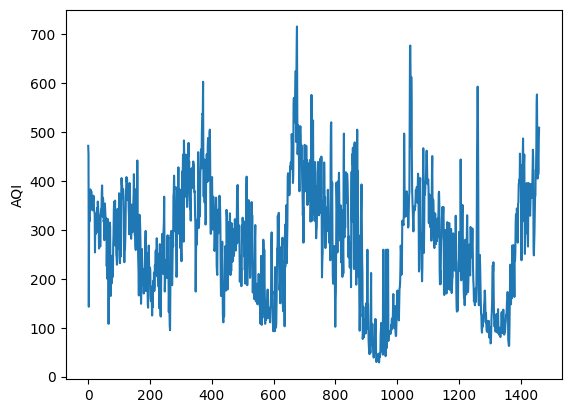

In [150]:
sns.lineplot(polln.AQI)

In [151]:
upper=polln.AQI.mean()+3*polln.AQI.std()
lower=polln.AQI.mean()-3*polln.AQI.std()
print(upper,lower)

629.2796174458376 -77.12783450440105


In [152]:
polln.AQI=np.where(polln.AQI>upper,upper,polln.AQI)

<Axes: xlabel='Date', ylabel='AQI'>

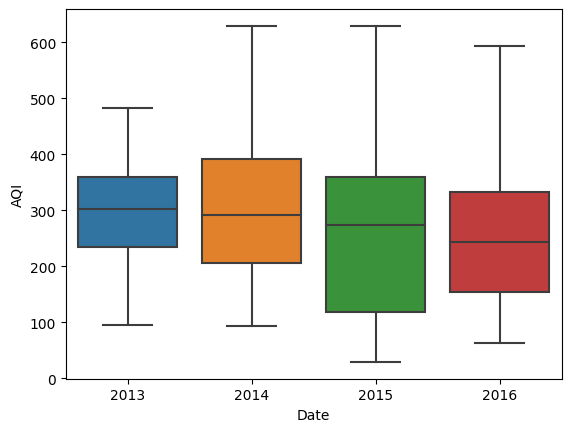

In [153]:
sns.boxplot(x=polln.Date.dt.year,y=polln.AQI)

In [154]:
polln2=polln.iloc[:,:14].groupby(polln.Date.dt.year).mean()
polln2

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2013,2013-07-02 00:00:00,117.340822,230.044889,32.911397,50.434384,81.786329,47.512356,5.255151,12.606904,57.395507,3.690904,10.745671,2.770979,297.024658
2014,2014-07-02 00:00:00,138.303781,257.371954,50.761671,63.507315,75.678548,42.715660,1.611370,18.778247,76.951068,4.510904,12.966767,1.434398,300.789170
2015,2015-07-02 00:00:00,124.787157,258.879625,50.690935,57.597124,34.850877,44.801558,0.695534,21.438432,44.240667,2.525151,7.629507,1.079451,256.229997
2016,2016-07-01 12:00:00,115.541667,240.671639,36.625328,45.980027,57.165874,42.509563,1.408552,13.654781,44.460082,3.617514,24.305792,1.052869,249.710383
